In [227]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy.stats import pearsonr

In [228]:
raw_counts = pd.read_csv(r'D:\Personal\Academics\UTA\3rd semester\Bioinformatics\Project\normalized_counts_vst.csv', index_col=0)
raw_counts = raw_counts.T

In [229]:
metadata_file = r"D:\Personal\Academics\UTA\3rd semester\Bioinformatics\Project\metadata.csv" 
metadata = pd.read_csv(metadata_file, sep=',')

In [230]:
df = pd.merge(raw_counts, metadata, left_index=True, right_on='Sample_ID')
df = df.drop(['Sample_ID','Clade', 'Dominant' ],axis=1)
df

,A0A011QK89,A0A023I7E1,A0A067XMP1,A0A067YMX8,A0A075HNX4,A0A0A0RM07,A0A0B4KGY6,A0A0B6VQ48,A0A0B7P9G0,A0A0G2JDV3,...,S8GJB7,V6CLA2,W0LYS5,W0TIW1,W7JLR6,W7JX98,W7K9M0,W7NDQ0,X1WER2,Host
0,3.907570,1.620841,3.004398,2.703474,2.986870,2.241169,2.521235,3.692186,3.004398,6.353335,...,1.620841,1.856850,3.104000,3.119761,3.371791,1.856850,2.359892,4.727864,4.686284,MCAV
1,5.441870,1.620841,2.535626,3.657173,3.478619,2.503367,3.106804,4.619353,4.672777,7.503357,...,1.869137,2.976699,3.426356,3.944844,4.232551,2.173351,2.273015,6.026444,6.010146,MCAV
2,5.331988,1.620841,3.125354,3.570151,3.630813,2.891829,2.891829,4.273808,5.297177,7.510740,...,2.346861,3.570151,2.414528,3.368204,4.119319,2.729975,2.684824,5.862211,5.935485,MCAV
3,5.619051,1.974893,2.605541,3.519751,2.948207,2.404832,3.137391,4.295079,4.585000,7.673688,...,2.544092,2.905994,2.544092,3.662709,4.478651,1.620841,2.477620,6.219767,5.997715,MCAV
4,5.021363,1.620841,2.913924,3.443582,3.627241,2.838415,2.937903,4.301555,4.861119,7.184987,...,2.152548,3.050253,2.454656,3.666083,3.930574,2.567736,2.214481,5.709837,5.492568,MCAV
5,5.048947,2.155858,3.438346,3.396352,3.646922,2.673509,3.186723,4.458022,4.726426,7.370989,...,2.537347,3.284503,3.079813,3.646922,3.871036,2.630471,1.930909,5.759675,5.397468,MCAV
6,4.732517,2.933164,6.922549,1.620841,2.264749,5.577888,4.111295,3.552054,5.850194,7.033953,...,3.466950,2.524211,2.650763,1.620841,4.438061,3.110643,2.650763,5.622068,5.640270,OANN
7,4.913929,3.388497,6.696605,3.372314,2.458468,5.637551,5.202182,5.379956,5.686338,6.937930,...,2.761752,4.049790,3.234313,1.889072,4.834389,4.641766,2.572031,5.402069,5.521292,OANN
8,4.576992,2.793144,7.024587,1.620841,2.263097,5.272499,4.111187,3.294326,5.740097,6.850679,...,3.205545,1.620841,2.715986,1.800330,3.873575,2.729293,2.688782,5.488106,5.394268,OANN
9,4.538450,3.150154,7.086066,1.620841,2.208325,5.595623,4.221666,3.731320,6.015547,7.021467,...,3.353942,2.702051,2.901160,1.620841,4.129572,2.901160,3.826660,5.545712,5.608473,OANN


In [231]:
df['Host'] = (df['Host']=='OANN').astype(int)

In [232]:
y = df['Host']
X = df.drop(['Host'],axis=1)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=41)

Partial Least Square Cross-validated Accuracy: 0.875
Partial Least Square Test Set Accuracy: 0.8888888888888888
Error Rate for Partial Least Square : 0.11111111111111116
Top Genes for PLS Method:  Index(['O94264', 'Q54GE3', 'B9F676', 'A1CUK5', 'Q6GNI4'], dtype='object')


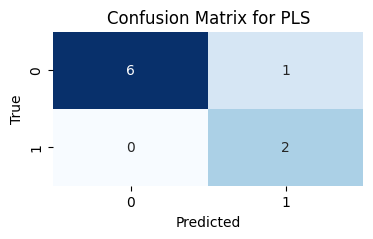

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2

    accuracy                           0.89         9
   macro avg       0.83      0.93      0.86         9
weighted avg       0.93      0.89      0.90         9



In [234]:
pls = PLSRegression(n_components=5) 
y_pred_cv = cross_val_predict(pls, X_train, y_train, cv=5)
threshold = 0.5 
y_pred_cv = (y_pred_cv > threshold).astype(int)
cv_accuracy = accuracy_score(y_train, y_pred_cv)
print("Partial Least Square Cross-validated Accuracy:", cv_accuracy)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_binary)
print("Partial Least Square Test Set Accuracy:", test_accuracy)
error_rate = 1 - test_accuracy
print(f"Error Rate for Partial Least Square : {error_rate}")
loadings_component_1 = pls.x_weights_[:, 0]
top_gene_indices = loadings_component_1.argsort()[-5:][::-1]
top_genes = X_train.columns[top_gene_indices]
print("Top Genes for PLS Method: ", top_genes)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for PLS')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))


In [235]:
lr = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-validated Accuracy:", cv_scores.mean())
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Test Set Accuracy:", test_accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the error rate
error_rate = (conf_matrix[0, 1] + conf_matrix[1, 0]) / conf_matrix.sum()

print("Confusion Matrix:")
print(conf_matrix)
print(f"Error Rate: {error_rate:.4f}")

"""What is the Error Rate of These Algorithms?                                                  <BR>
From the above code, we can tell that the error rate is 0.
"""

# Fit the logistic regression model
lr.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = lr.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the DataFrame sorted by absolute coefficient values
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features
top_features = sorted_coefficients.head(10)  # Adjust the number as needed
print("Top Features:")
print(top_features)

Logistic Regression Cross-validated Accuracy: 0.9380952380952381
Logistic Regression Test Set Accuracy: 1.0
Confusion Matrix:
[[7 0]
 [0 2]]
Error Rate: 0.0000
Top Features:
     Feature  Coefficient  Absolute Coefficient
2349  Q7PHR1    -0.028657              0.028657
617   O88764     0.025619              0.025619
318   F4HQD4     0.025353              0.025353
2752  Q8ZRS8     0.025322              0.025322
2032  Q5RE15     0.023800              0.023800
3270  Q9SF16     0.023698              0.023698
2473  Q86WI1    -0.023338              0.023338
2815  Q94B38     0.023211              0.023211
2417  Q80TF6     0.022660              0.022660
2214  Q6H6D2     0.022637              0.022637


In [236]:
svm = SVC(kernel='linear',degree=5)
cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print("Support Vector Machine Cross-validated Accuracy:", cv_scores.mean())
svm.fit(X_train, y_train)
# Obtain the indices of the support vectors (genes)
support_vector_indices = svm.support_
# Display the indices of the genes used for prediction
print("Indices of Genes Used for Prediction:", support_vector_indices)
selected_genes = X_train.columns[support_vector_indices]
print("Genes Used for Prediction:", selected_genes)
y_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machine Test Set Accuracy:", test_accuracy)
print("No of Conponents:", svm.support_vectors_.shape[0])

Support Vector Machine Cross-validated Accuracy: 0.9380952380952381
Indices of Genes Used for Prediction: [ 0  1  2  4 11 13 14 15 17 21 23 24 25 30 31  6  7  9 20]
Genes Used for Prediction: Index(['A0A011QK89', 'A0A023I7E1', 'A0A067XMP1', 'A0A075HNX4', 'A0A0H2VDN9',
       'A0A0K2JKU1', 'A0A0K9RDW0', 'A0A0M5K865', 'A0A0R4IKJ1', 'A0A140JWS7',
       'A0A1D8PDZ1', 'A0A1P8AUY4', 'A0A2I0BVG8', 'A0A4Y1YQ38', 'A0A4Y1YTM1',
       'A0A0B4KGY6', 'A0A0B6VQ48', 'A0A0G2JDV3', 'A0A125YZN2'],
      dtype='object')
Support Vector Machine Test Set Accuracy: 0.8888888888888888
No of Conponents: 19


In [237]:
lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, X_train, y_train, cv=5, scoring='accuracy')
print("Linear Discrimiant Analysis Cross-validated Accuracy:", cv_scores.mean())
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Linear Discrimiant Analysis Test Set Accuracy:", test_accuracy)

#Decision Values
lda_decision_values = lda.decision_function(X_test)
print("\nDecision Values:", lda_decision_values)

#Predicted Probabilities
lda_predicted_probabilities = lda.predict_proba(X_test)
print("\nPredicted Probabilities:", lda_decision_values)

#Predicted Classes
lda_predicted_classes = lda.predict(X_test)
print("\nPredicted Classes:", lda_predicted_classes)

#Confusion Matrix
lda_confusion_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:", lda_confusion_matrix)

#Classification Report
lda_classification_report = classification_report(y_test, y_pred)
print("\nClassification Report:", lda_classification_report)


Linear Discrimiant Analysis Cross-validated Accuracy: 0.8761904761904763
Linear Discrimiant Analysis Test Set Accuracy: 1.0

Decision Values: [ -3.18683695 -16.0227028  -19.32548581  -2.39575302  -9.46671448
   7.45079976 -13.77101124 -15.16035108  10.28407297]

Predicted Probabilities: [ -3.18683695 -16.0227028  -19.32548581  -2.39575302  -9.46671448
   7.45079976 -13.77101124 -15.16035108  10.28407297]

Predicted Classes: [0 0 0 0 0 1 0 0 1]

Confusion Matrix: [[7 0]
 [0 2]]

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [238]:
corr_matrix = df.drop('Host', axis=1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_filtered = df.drop(columns=to_drop)

# Remove constant features
df_filtered = df_filtered.loc[:, df_filtered.apply(pd.Series.nunique) != 1]

# Prepare data for modeling
y = df_filtered['Host']
X = df_filtered.drop(['Host'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=41)



# Apply PCA to reduce dimensionality
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Determine the number of components to retain a certain percentage of variance (e.g., 95%)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance >= 0.65) + 1

# Apply PCA again with the selected number of components
n_components = min(X_train.shape[0], X_train.shape[1])
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Number of features:", n_components)

# Train QDA and evaluate
qda = QuadraticDiscriminantAnalysis()
cv_scores = cross_val_score(qda, X_train_pca, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", round(cv_scores.mean(),4))
qda.fit(X_train_pca, y_train)
y_pred = qda.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", round(test_accuracy,4))
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Calculate and print error rate
error_rate = 1 - test_accuracy
print("Error Rate:", round(error_rate,4))

# Calculate correlation coefficients for each gene
correlation_values = df.drop('Host', axis=1).apply(lambda gene: pearsonr(gene, df['Host'])[0])

# Get the top 2 positively and negatively correlated genes
top_pos_correlated_genes = correlation_values.abs().nlargest(2).index
top_neg_correlated_genes = correlation_values.abs().nsmallest(2).index

# Print gene names
print("Top 2 positively correlated genes:")
print(top_pos_correlated_genes)

print("\nTop 2 negatively correlated genes:")
print(top_neg_correlated_genes)

# Get the most influential genes from the first principal component
most_influential_genes = pd.DataFrame({'Gene': X.columns, 'Weight': pca.components_[0]})
most_influential_genes = most_influential_genes.sort_values(by='Weight', ascending=False)
display(most_influential_genes)

Number of features: 32
Cross-validated Accuracy: 0.8143
Test Set Accuracy: 0.8889
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2

    accuracy                           0.89         9
   macro avg       0.83      0.93      0.86         9
weighted avg       0.93      0.89      0.90         9

Error Rate: 0.1111


c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\karav\AppData\Local\Programs\Python\Pytho

Top 2 positively correlated genes:
Index(['Q54GE3', 'O94264'], dtype='object')

Top 2 negatively correlated genes:
Index(['P23403', 'O44001'], dtype='object')


,Gene,Weight
847,Q3BAI2,0.155667
168,B5LVL2,0.090556
120,A7SDW5,0.070696
505,P23489,0.061630
1306,Q9NES8,0.031941
...,...,...
904,Q54J47,-0.069080
266,O00909,-0.072321
801,Q23716,-0.074073
51,A0T0C6,-0.074979
